<a href="https://colab.research.google.com/github/aliciachaves/MNIST/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
print('X_train: ' + str(train_X.shape)) #60000 imagens com dimensões 28x28
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape)) #10000 imagens
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


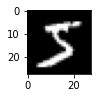

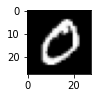

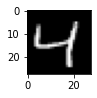

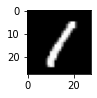

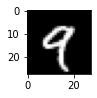

In [ ]:
from matplotlib import pyplot
for i in range(5):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray')) #default: 'viridis'
  pyplot.show()

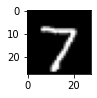

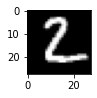

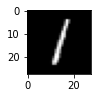

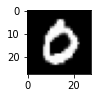

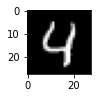

In [ ]:
for i in range(5):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray')) #default: 'viridis'
  pyplot.show()

In [ ]:
# Normalizar as imagens de [0, 255] para [-0.5, 0.5] -> valores pequenos e centrais normalmente geram melhores resultados
train_X = (train_X / 255) - 0.5
test_X = (test_X / 255) - 0.5

In [ ]:
#   Keras requer uma terceira dimensão -> transforma (28,28) em (28,28,1)
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)

print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Building The Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten # convolution layers

In [ ]:
num_filters = 8 # quantidade de filtros Conv
filter_size = 3 # dimensão do filtro Conv2D 3x3
pool_size = 2 # tamanho do maxpooling

In [ ]:
model = Sequential([

  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)), # conjunto de filtros que individualmente produzem um activation map 2D -> indicam se um neuron deve ser ativado ou não

  MaxPooling2D(pool_size=pool_size), # reduz o "tamanho espacial" da imagem, a quantidade de parâmetros e controla o overfitting

  Flatten(),

  Dense(10, activation='softmax'), # 10 classes para 10 possibilidades de números (0 a 9)
])

**Compiling the Model**

In [ ]:
model.compile(
  'adam', # otimizador
  loss='categorical_crossentropy', # loss function
  metrics=['accuracy'], # lista de métricas
)

**Training the Model**

In [ ]:
from keras.utils import to_categorical


In [ ]:
model.fit(
  train_X, # dados input
  to_categorical(train_y), # to_categorical converte em binário -> label y é o certo: sim ou não
  epochs=3, # número de vezes que os dados serão testados pela rede neural
  validation_data=(test_X, to_categorical(test_y)), # avalia a acurácia e erro no final de cada epoch
)

Epoch 1/3
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2555 - accuracy: 0.9257 - val_loss: 0.1797 - val_accuracy: 0.9475
Epoch 2/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1572 - accuracy: 0.9549 - val_loss: 0.1249 - val_accuracy: 0.9609
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1177 - accuracy: 0.9664 - val_loss: 0.1011 - val_accuracy: 0.9698


In [ ]:
model.save_weights('cnn.h5') # caminho para o arquivo onde serão guardados os valores dos pesos (weights)

In [ ]:
predictions = model.predict(test_X[:5]) # fazer predição nas primeiras 5 imagens do dataset (5, 0, 4, 1, 9)

print(np.argmax(predictions, axis=1))

print(test_y[:5]) # verificar se as predições estão certas

1/1 [==============================] - 0s 20ms/step
[7 2 1 0 4]
[7 2 1 0 4]
